In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)


from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import BaggingClassifier



from sklearn.ensemble import RandomForestClassifier
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Your code here

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive (24)\water_potability.csv")

In [4]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

# Checking for missing values


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
print("Missing total")
print(df.isna().sum())
print('---------')
print('Missing percentages')
print(df.isna().sum() / df.shape[0])
print('---------')
missing = []
columns = df.columns
for i, v in enumerate(df.isna().sum()):
    if v > 0:
        missing.append(columns[i])
print(missing)

Missing total
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
---------
Missing percentages
ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64
---------
['ph', 'Sulfate', 'Trihalomethanes']


As we can see there are some missing values in the data set which can be easily dealt with by these methods such as:
- Use imputation techniques that use mean, median or mode to generate data for missing values 
- Use advanced techniques such as KNN imputer which consider other data points for guessing the best values for the missing spots, I will use this technique in this case 


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Dealing with missing data using KNN imputer 


In [6]:
X = df.drop('Potability', axis=1)
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)
df_ = pd.DataFrame(X_imputed, columns=X.columns)


# I will leave out the target value then fit the KNN imputer to the rest of the dataset for generating missing values 

In [8]:
y = df['Potability']
df = pd.concat([df_, y], axis=1)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        64.327280   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

-----------------------------------------------------------------------------------
After concatenating the transformed data with imputed missing values, I will do some basic EDA

-----------------------------------------------------------------------------------

# Perform basic EDA

# 1. Do the histogram to check the distribution and the relationship between all the feature with the target, using hue too

- After plotting the histogram, i have seen that there are normal distribution of the features, however, there are still slight skewness in some features

- But i can see imbalance in the data where the number of class 0 is slightly larger than class 1 


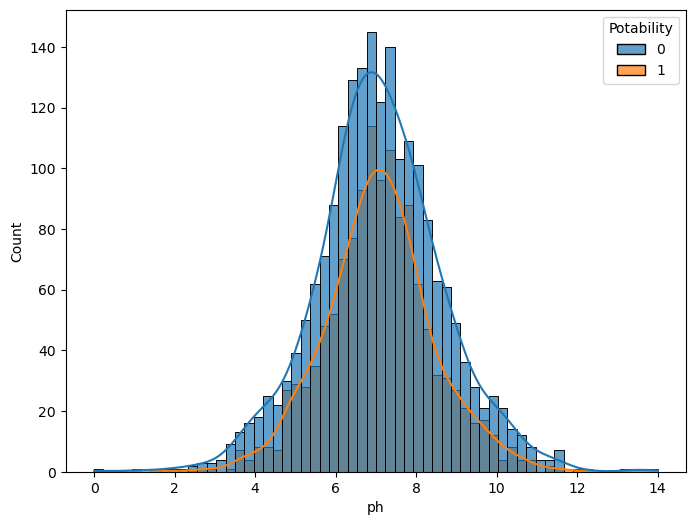

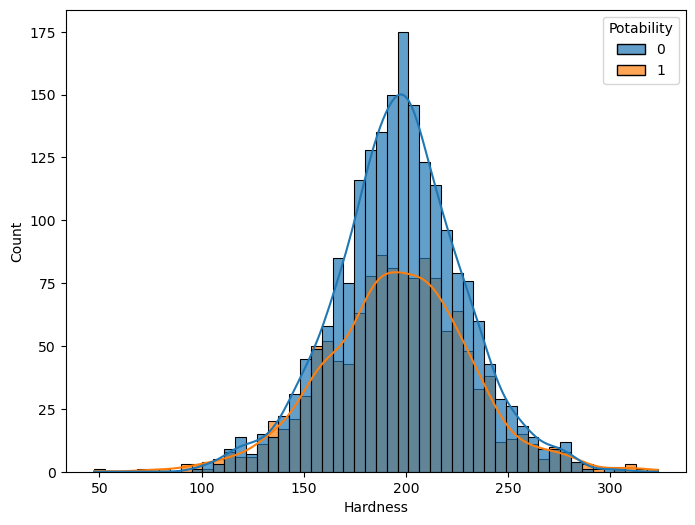

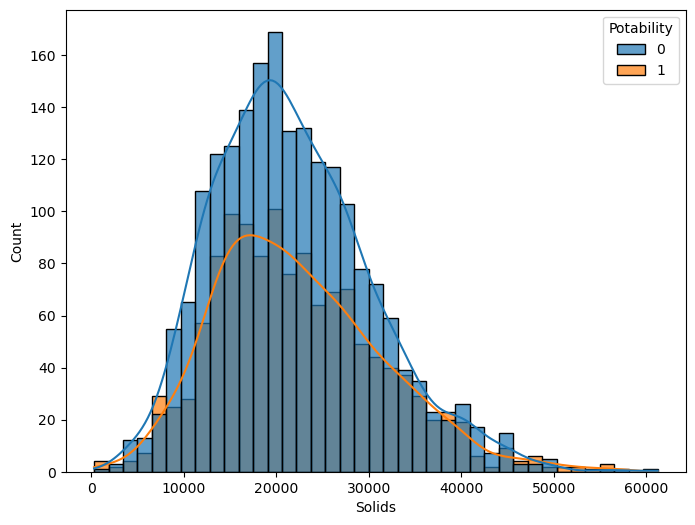

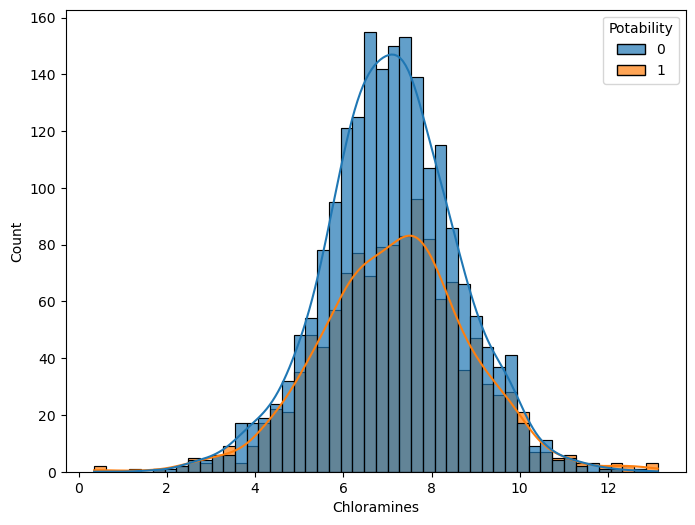

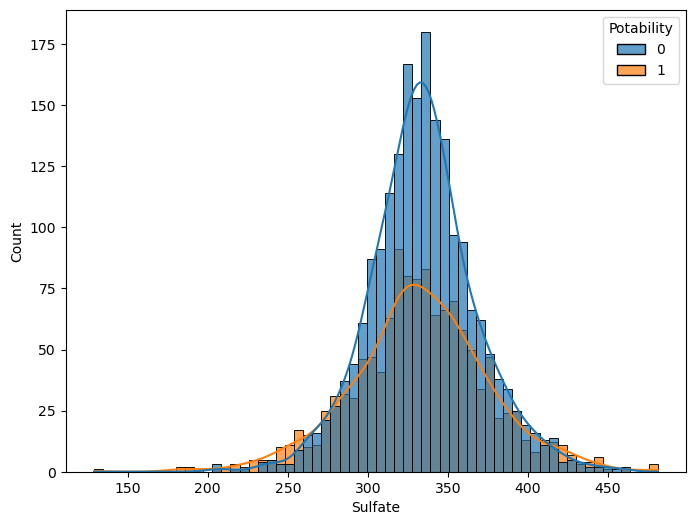

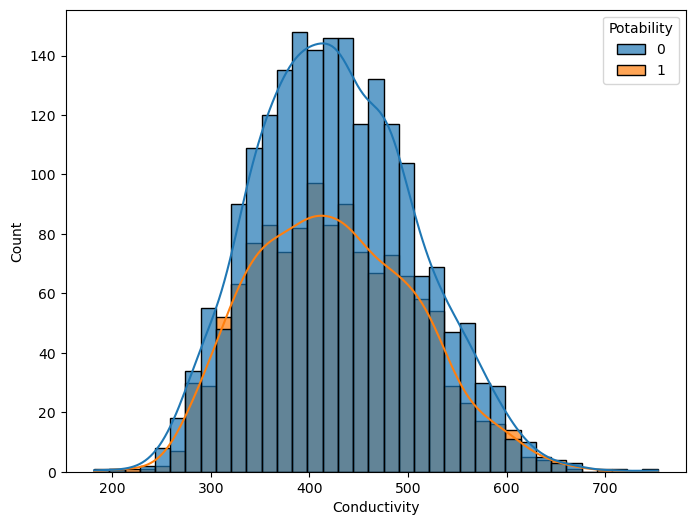

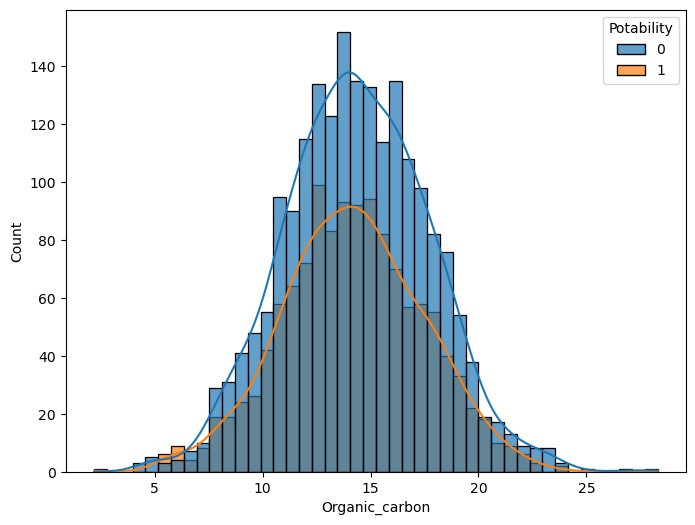

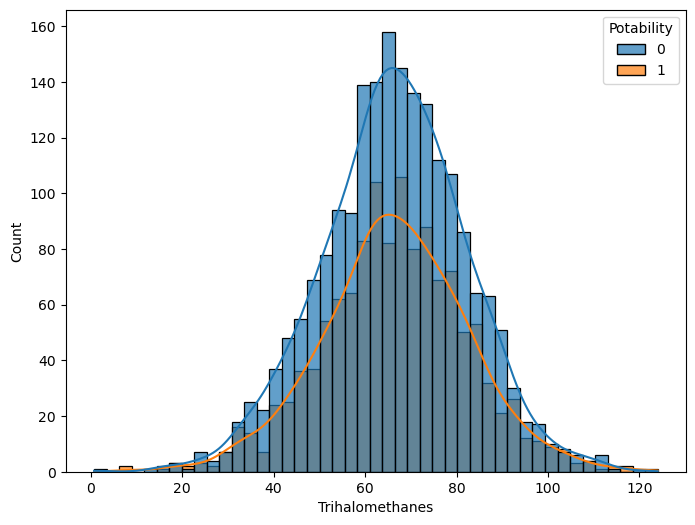

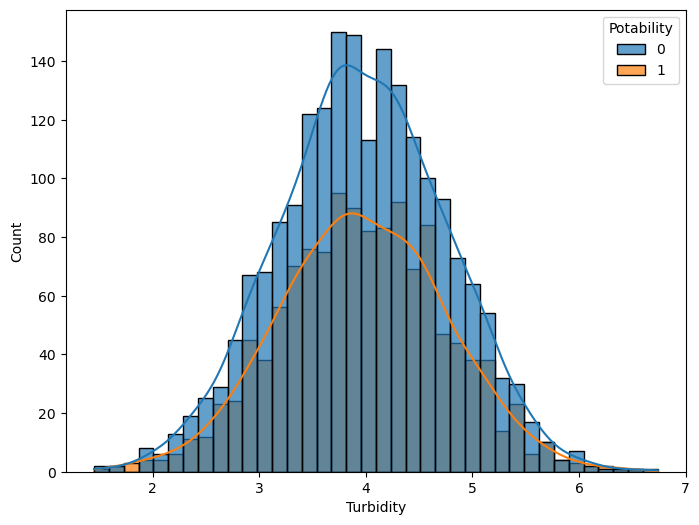

In [9]:
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x=col, hue='Potability', kde=True, alpha=0.7)
    plt.show()


--------------------------------------------------------------
I can see that most of my features are normally distributed, however there are some skewness in the some features, so I will check the skewness for further investigation

--------------------------------------------------------------

2. Checking for skewness 
The skewness is not drastically, so I will leave it there without transformation process

In [10]:
print('Feature with high skewness:')
for i, v in enumerate(df.skew()):
    if v > 0.5 or v < -0.5:
        print(columns[i], ':', v)

Feature with high skewness:
Solids : 0.6216344855169127


There is a slight skewness in this feature, however for now, I will leave it alone without doing transformation to see the model's robustness when dealing with these skewness in the dataset

# 3. Checking the correlation and relationship between features and the target using pair plot and heatmap 


# Though there are low correlation between the features and the target, and no clear relationship 

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


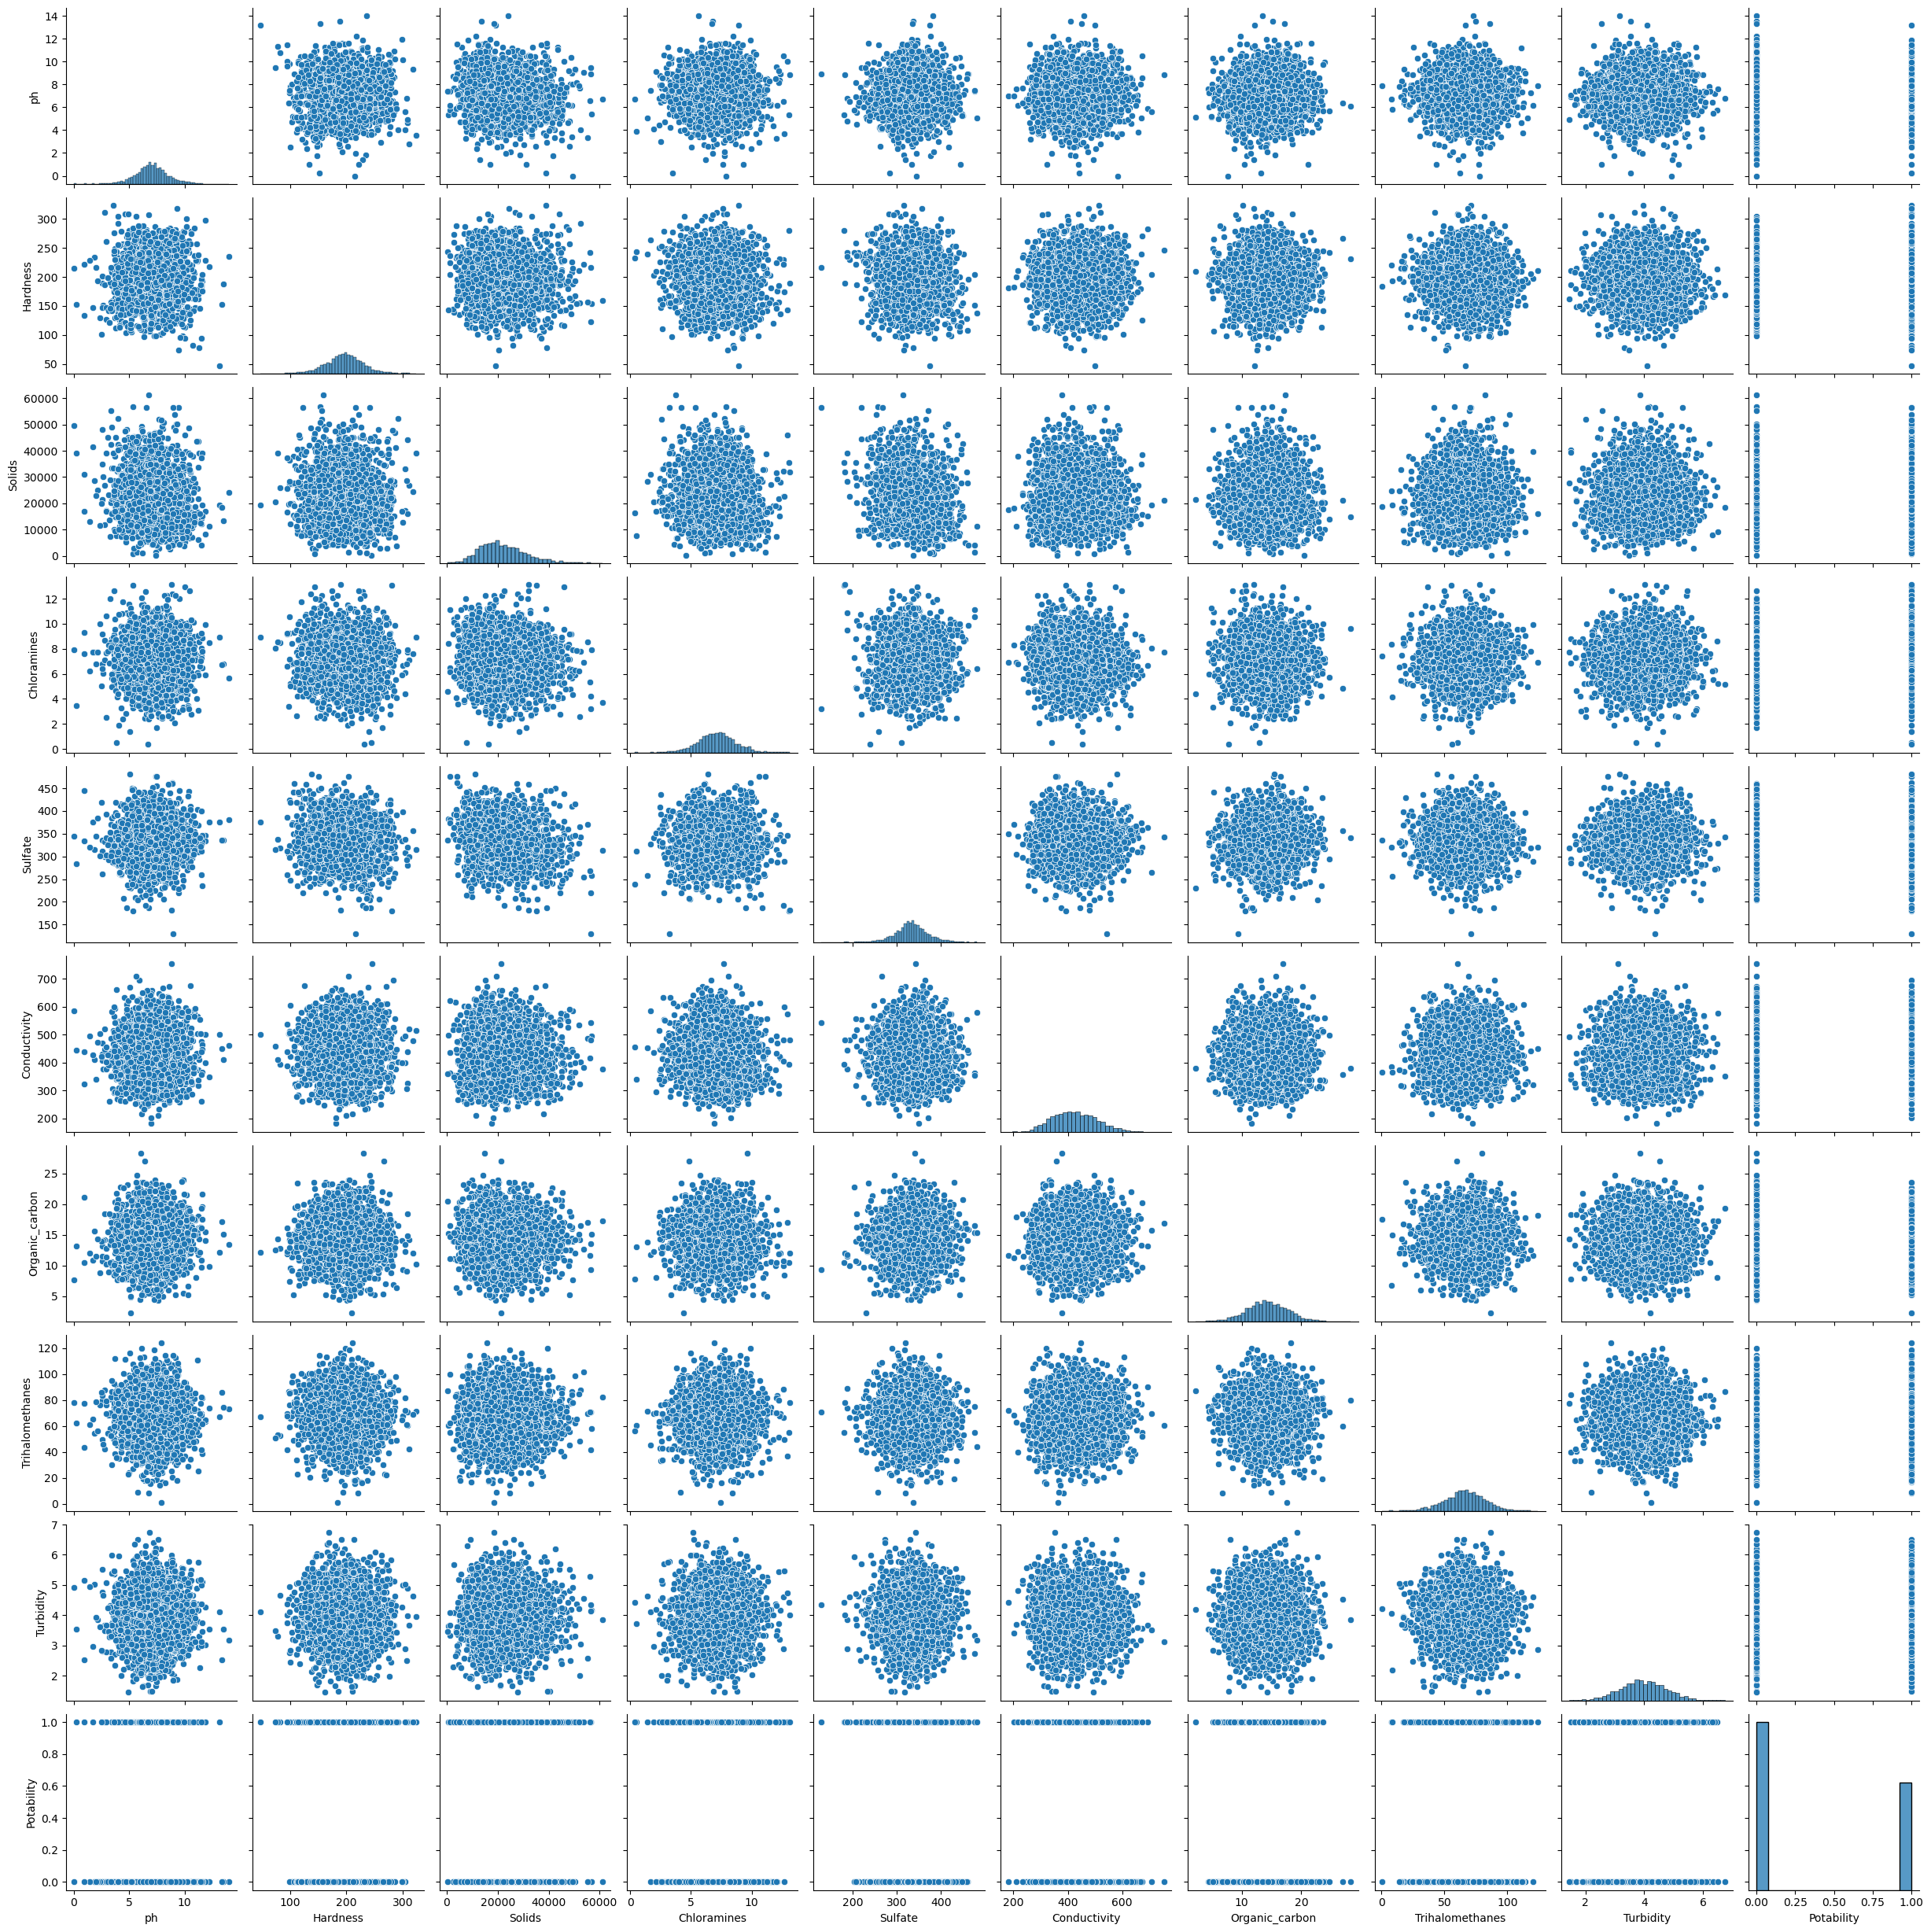

In [11]:
sns.pairplot(df)

I don't see any particular linear pattern in the data set. However I noticed that there is imbalanced amount of the potability feature which can affect the data set, but for now I will continue with EDA 

<Axes: >

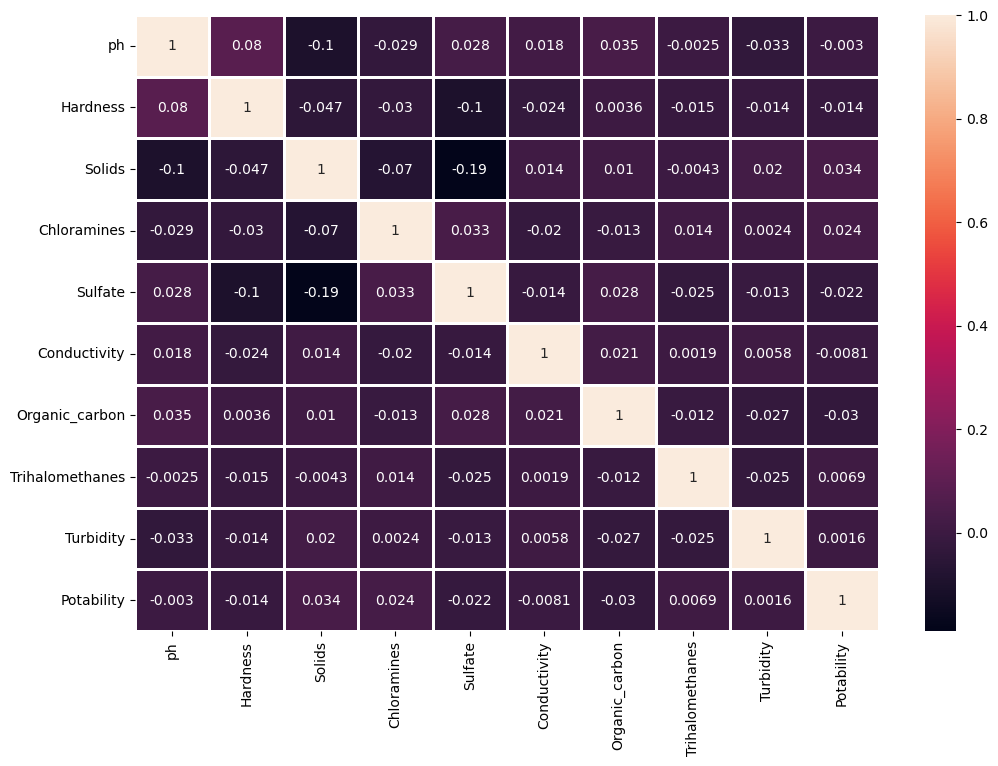

In [12]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, lw=1)

# 3. Creating new features 
- My strategy is to base on the information given from the dataset of the thresholds of each chemical element that affect the Potability of water 


In [13]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [14]:
df['ph_level'] = pd.cut(df['ph'], bins=[0, 6.9, 7.1, 14], labels=['acidic', 'neutral', 'alkaline'], include_lowest=True)
df['tds_level'] = pd.cut(df['Solids'], bins=[0, 500, 1000, float('inf')], labels=['low', 'moderate', 'high'], include_lowest=True)
df['chloramines_level'] = pd.cut(df['Chloramines'],  bins=[0, 4, float('inf')], labels=['low', 'high'], include_lowest=True)
df['trihalomethanes_level'] = pd.cut(df['Trihalomethanes'], bins=[0, 80, float('inf')], labels=['safe', 'unsafe'], include_lowest=True)

ordinal_mapping = {
    'acidic': 0,
    'neutral': 1,
    'alkaline': 2,
    'low': 0,
    'moderate': 1,
    'high': 2,
    'safe': 0,
    'unsafe': 1,
    'low': 0,
    'high': 1
}

df['ph_level'] = df['ph_level'].map(ordinal_mapping)
df['tds_level'] = df['tds_level'].map(ordinal_mapping)
df['chloramines_level'] = df['chloramines_level'].map(ordinal_mapping)
df['trihalomethanes_level'] = df['trihalomethanes_level'].map(ordinal_mapping)

In [15]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

In [16]:
y 

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [17]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

<Axes: >

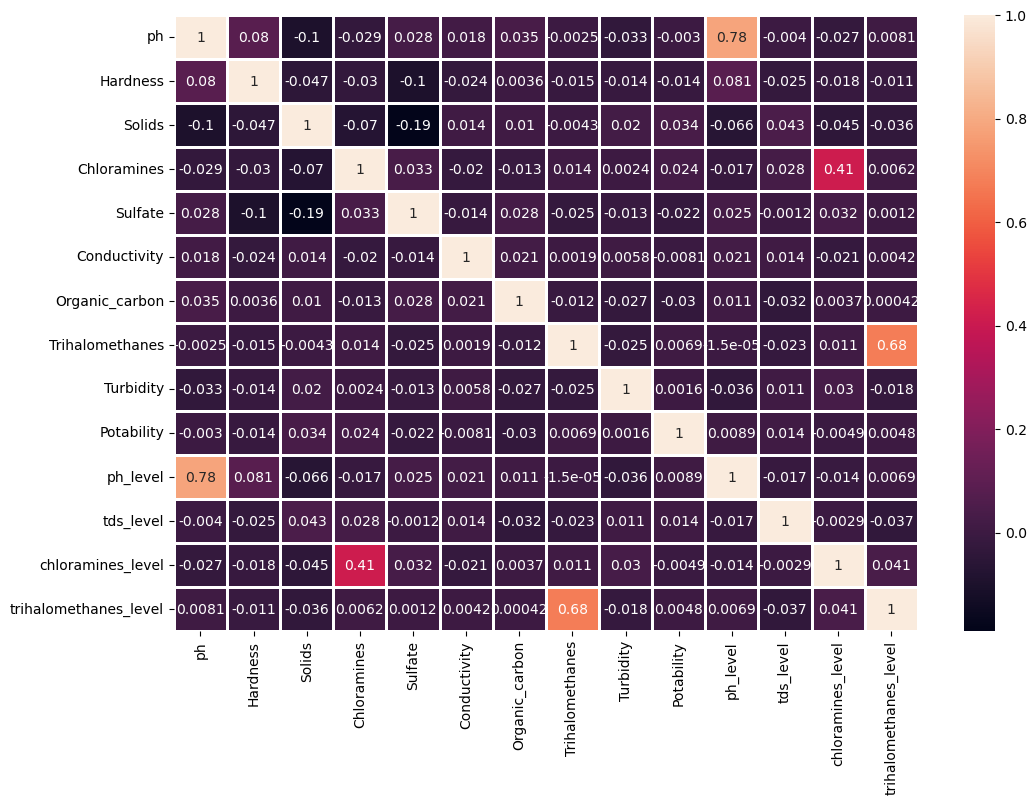

In [18]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, lw=1)

# Dealing with imbalanced data in the target 
So i did try to use a baseline models to  check if fixing imbalanced target can improve the prediction, in this case i use logistic but it seems that i didn't have much improvements, so i will still use the balanced target 


In [19]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [20]:
X, y = df.drop('Potability', axis=1), df['Potability']
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
print(pd.Series(y_resampled).value_counts())

Potability
0    1998
1    1998
Name: count, dtype: int64


In [21]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [22]:
df_copy = df.copy()
df_copy['Potability'] = y_resampled

In [23]:
df_copy

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

<Axes: >

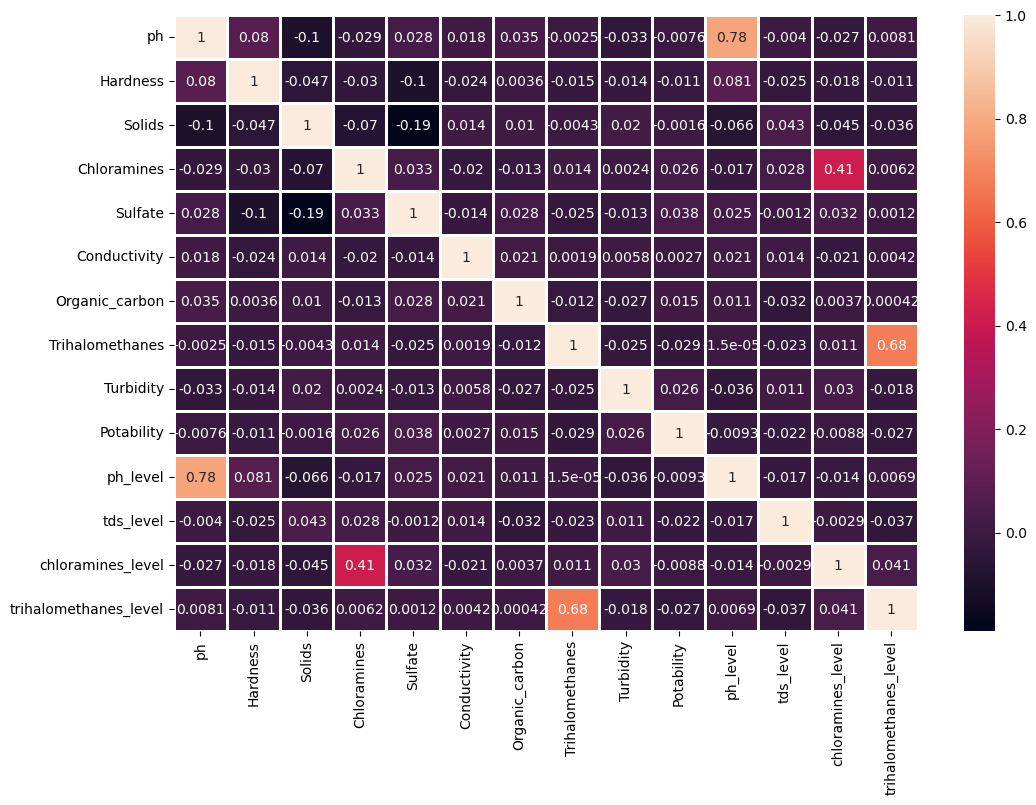

In [24]:
correlation_after_resample = df_copy.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_after_resample, annot=True, lw=1)

In [25]:
X, y = df.drop('Potability', axis=1), df['Potability']
X_copy, y_copy = df_copy.drop('Potability', axis=1), df_copy['Potability']
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train_copy = scale.fit_transform(X_train_copy)
X_test_copy = scale.transform(X_test_copy)
                                                                       
lr = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 1000, 10000]
}

grid_base_line_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, error_score='raise')
grid_base_line_lr.fit(X_train, y_train)
y_pred_lr = grid_base_line_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

grid_base_line_lr.fit(X_train_copy, y_train_copy)
y_pred_lr_copy = grid_base_line_lr.predict(X_test_copy)
print(classification_report(y_test_copy, y_pred_lr_copy))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Fitting 5 folds for each of 45 candidates, totalling 225 fits
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       415
           1       0.00      0.00      0.00       241

    accuracy                           0.63       656
   macro avg       0.32      0.50      0.39       656
weighted avg       0.40      0.63      0.49       656



In [26]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

In [27]:
df_copy

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

# 5 Checking and dealing outliers using boxplot and zscore 

I forgot to check for outliers
So removing outliers didn't improve the accuracy and the performance in general. I think i need to use different models 


In [28]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

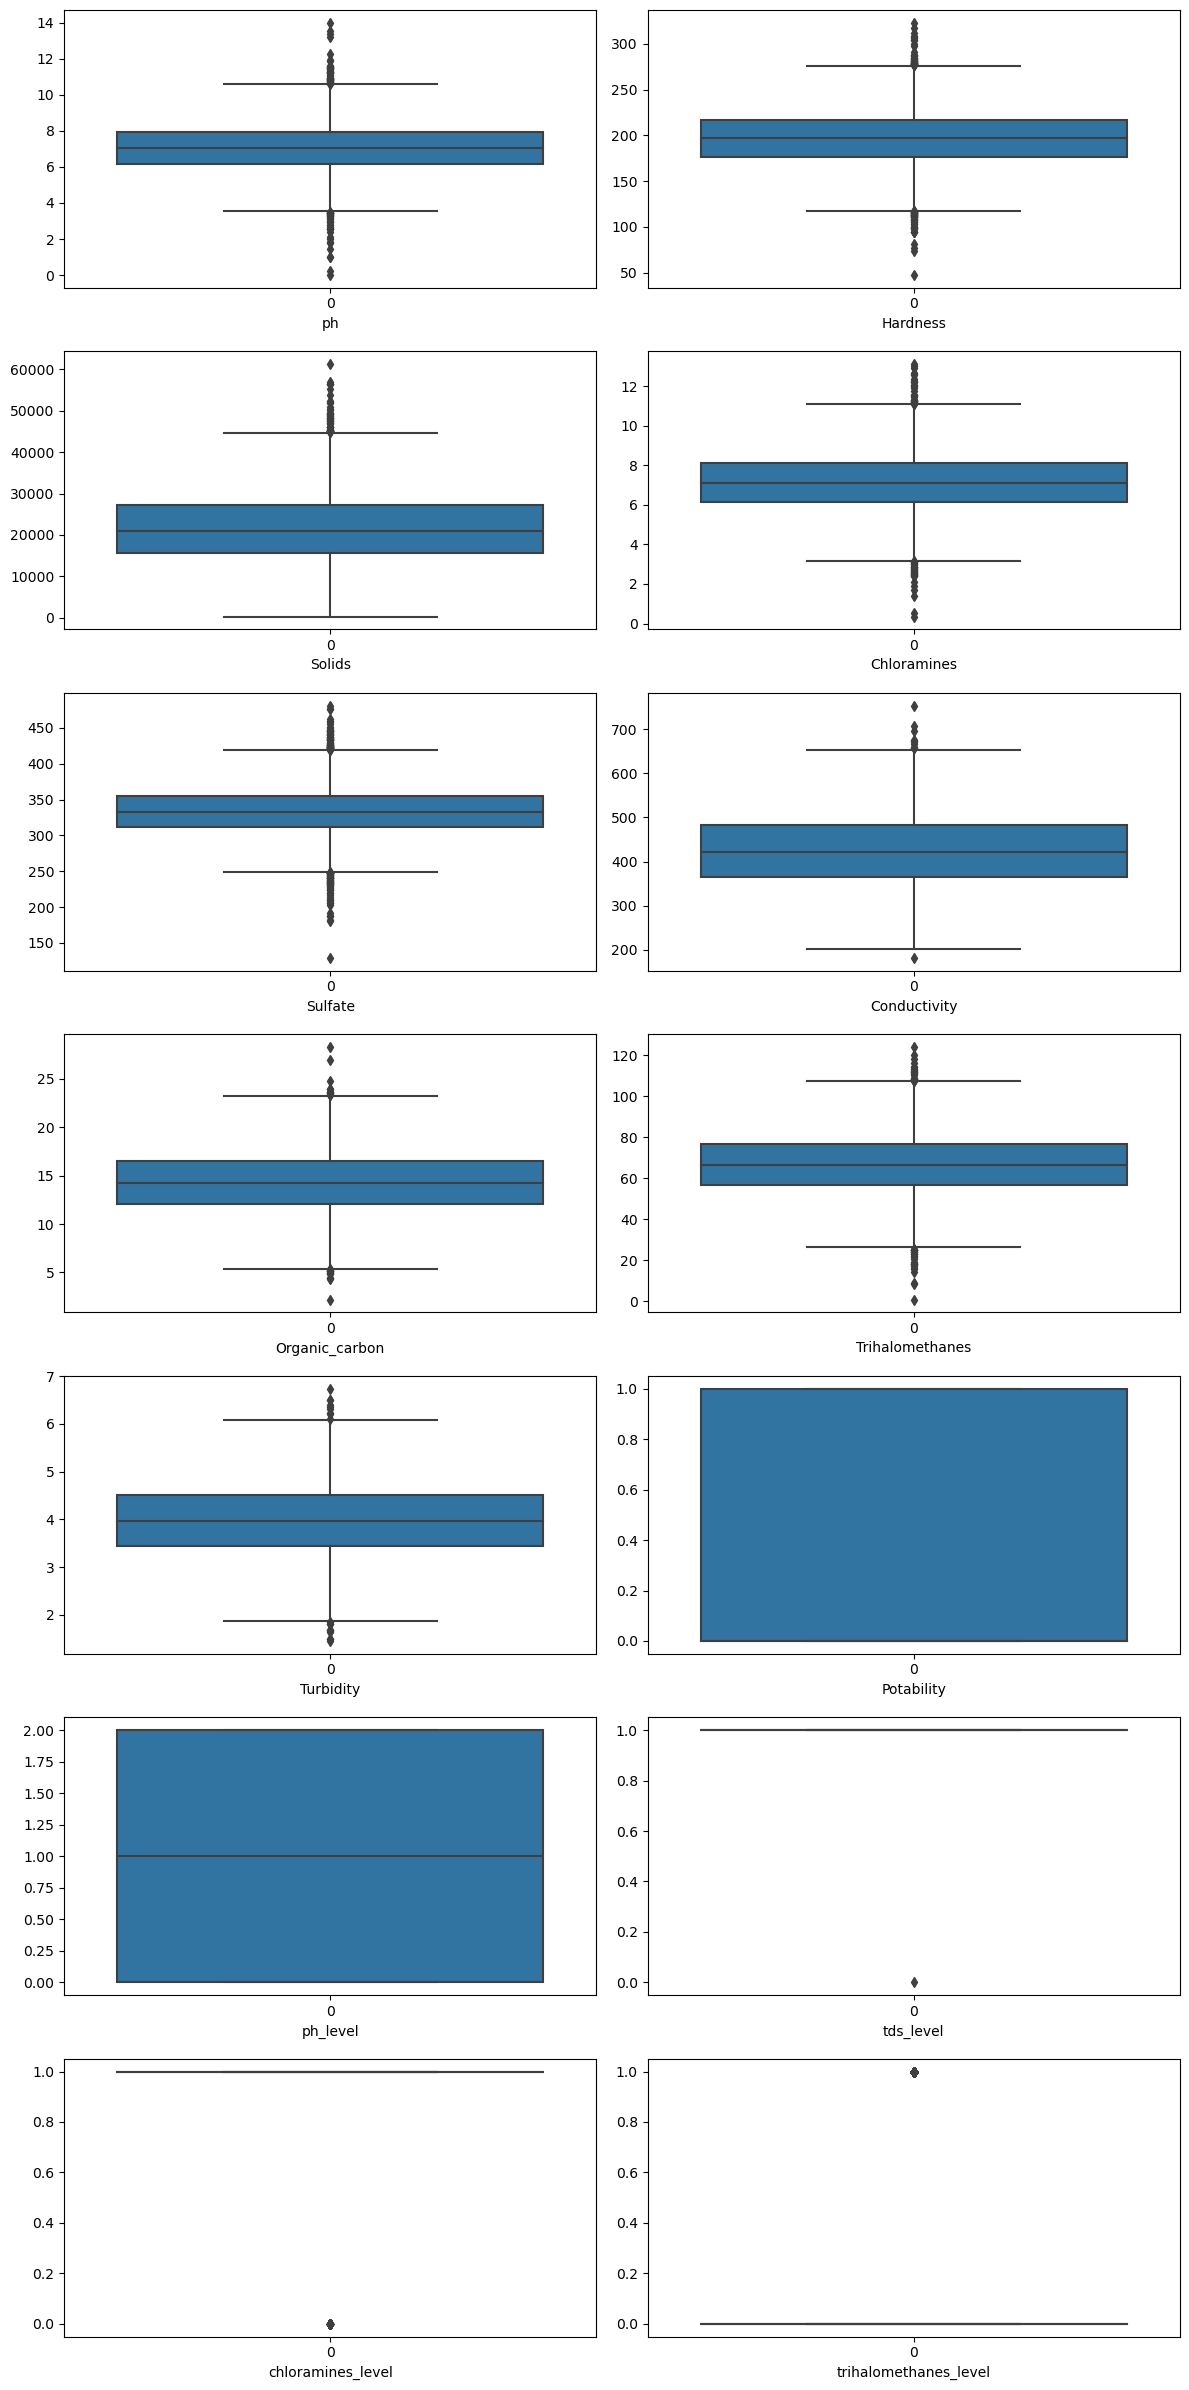

In [29]:
fig, axs = plt.subplots(7, 2, figsize=(12, 24))
indices = 0
axs = axs.flatten()
for i in df_copy.columns:
    sns.boxplot(df[i], ax=axs[indices])
    axs[indices].set_xlabel(i)  # Set x-label
    indices += 1
plt.tight_layout()  # Adjust the layout
plt.show()

I noticed that there are a few outliers in some features 

In [30]:
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        df = df[(df[column] >= lower) & (df[column] <= upper )]
    return df

columns = ['ph', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
df_cleaned = remove_outliers(df, columns)

In [31]:
df_cleaned

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3270    415.886955       12.067620        60.419921   3.669712           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3270        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[2908 rows x 14 columns]

In [32]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 1000, 10000]
}
X, y = df_cleaned.drop('Potability', axis=1), df_cleaned['Potability']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
lr = LogisticRegression()
grid_remove_outliers = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_remove_outliers.fit(X_train, y_train)
y_pred = grid_remove_outliers.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
0.6219931271477663
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       362
           1       0.00      0.00      0.00       220

    accuracy                           0.62       582
   macro avg       0.31      0.50      0.38       582
weighted avg       0.39      0.62      0.48       582



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.6177987         nan 0.6177987  0.6177987  0.6177987  0.6177987
 0.6177987         nan 0.6177987  0.6177987  0.6177987  0.6177987
 0.6177987         nan 0.6177987  0.6177987  0.6177987  0.6177987
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.6177987         nan 0.6177987  0.61822881 0.61822881 0.61822881
 0.61822881        nan 0.61822881 0.61822881 0.61822881 0.61822881
 0.61822881        nan 0.61822881 0.61822881 0.61822881 0.61822881
 0.61822881        nan 0.61822881 0.61822881 0.61822881 0.61822881
 0.61822881        nan 0.61822881 0.61822881 0.61822881 

In [33]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3271        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[3276 rows x 14 columns]

In [34]:
xg = XGBClassifier()
param_grid_xg = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, verbose=2, n_jobs=-1)
grid_xg.fit(X_train, y_train)
y_pred_xg = grid_xg.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)
print(classification_report(y_test, y_pred_xg))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.6632302405498282
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       362
           1       0.71      0.18      0.29       220

    accuracy                           0.66       582
   macro avg       0.69      0.57      0.53       582
weighted avg       0.68      0.66      0.59       582



- So the xgboost classifier model i just used is applied for the dataframe after removing outliers but with imbalanced target. Down here will be xgboost after removing outliers and applying on to balanced taret data


In [35]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [36]:
df_remove_balance = pd.concat([X_resampled, y_resampled], axis=1)

In [37]:
df_remove_balance

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  4.959853  215.854869   9887.830755     6.954231  379.504731   
3992  7.260849  180.403802  29854.901034     5.836932  352.999150   
3993  7.221689  203.069029  13703.220377     7.823612  352.124567   
3994  5.640447  291.665331  16113.257301     7.783664  327.812712   
3995  7.777665  233.761579  16780.116147     6.123297  323.538055   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity ph_level  \
0       564.308654       10.379783        86.990970   2.963135        2   
1       592.885359       15.180013        56.329076   4.500656        0   
2       418.606213       16.868637        66.420093   3.055934        2   
3       363.266516       18.436524       100.341674   4.628771        2   
4       398.410813       11.558279        31.997993   4.075075        2   
...            ...             ...              ...        ...      ...   
3991    527.479694       14.326638        52.388849   3.455045        0   
3992    354.684607       17.914485        43.915782   3.456023      NaN   
3993    412.320490       16.125741        80.058877   3.160818        2   
3994    461.506642       18.299992        63.427855   3.941037      NaN   
3995    520.285094       17.794741        60.343891   4.683335        2   

      tds_level chloramines_level trihalomethanes_level  Potability  
0             1                 1                     1           0  
1             1                 1                     0           0  
2             1                 1                     0           0  
3             1                 1                     1           0  
4             1                 1                     0           0  
...         ...               ...                   ...         ...  
3991          1                 1                     0           1  
3992          1                 1                   NaN           1  
3993          1                 1                     1           1  
3994          1                 1                   NaN           1  
3995          1                 1                     0           1  

[3996 rows x 14 columns]

In [38]:
df_remove_balance.isna().sum()

ph                         0
Hardness                   0
Solids                     0
Chloramines                0
Sulfate                    0
Conductivity               0
Organic_carbon             0
Trihalomethanes            0
Turbidity                  0
ph_level                 398
tds_level                  0
chloramines_level         42
trihalomethanes_level    220
Potability                 0
dtype: int64

In [39]:
X = df_remove_balance.drop('Potability', axis=1)
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)
df_ = pd.DataFrame(X_imputed, columns=X.columns)

In [40]:
df_

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  4.959853  215.854869   9887.830755     6.954231  379.504731   
3992  7.260849  180.403802  29854.901034     5.836932  352.999150   
3993  7.221689  203.069029  13703.220377     7.823612  352.124567   
3994  5.640447  291.665331  16113.257301     7.783664  327.812712   
3995  7.777665  233.761579  16780.116147     6.123297  323.538055   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  ph_level  \
0       564.308654       10.379783        86.990970   2.963135       2.0   
1       592.885359       15.180013        56.329076   4.500656       0.0   
2       418.606213       16.868637        66.420093   3.055934       2.0   
3       363.266516       18.436524       100.341674   4.628771       2.0   
4       398.410813       11.558279        31.997993   4.075075       2.0   
...            ...             ...              ...        ...       ...   
3991    527.479694       14.326638        52.388849   3.455045       0.0   
3992    354.684607       17.914485        43.915782   3.456023       1.6   
3993    412.320490       16.125741        80.058877   3.160818       2.0   
3994    461.506642       18.299992        63.427855   3.941037       1.0   
3995    520.285094       17.794741        60.343891   4.683335       2.0   

      tds_level  chloramines_level  trihalomethanes_level  
0           1.0                1.0                    1.0  
1           1.0                1.0                    0.0  
2           1.0                1.0                    0.0  
3           1.0                1.0                    1.0  
4           1.0                1.0                    0.0  
...         ...                ...                    ...  
3991        1.0                1.0                    0.0  
3992        1.0                1.0                    0.2  
3993        1.0                1.0                    1.0  
3994        1.0                1.0                    0.0  
3995        1.0                1.0                    0.0  

[3996 rows x 13 columns]

In [41]:
df_remove_balance = pd.concat([df_, y_resampled], axis=1)

In [42]:
df_remove_balance

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  4.959853  215.854869   9887.830755     6.954231  379.504731   
3992  7.260849  180.403802  29854.901034     5.836932  352.999150   
3993  7.221689  203.069029  13703.220377     7.823612  352.124567   
3994  5.640447  291.665331  16113.257301     7.783664  327.812712   
3995  7.777665  233.761579  16780.116147     6.123297  323.538055   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  ph_level  \
0       564.308654       10.379783        86.990970   2.963135       2.0   
1       592.885359       15.180013        56.329076   4.500656       0.0   
2       418.606213       16.868637        66.420093   3.055934       2.0   
3       363.266516       18.436524       100.341674   4.628771       2.0   
4       398.410813       11.558279        31.997993   4.075075       2.0   
...            ...             ...              ...        ...       ...   
3991    527.479694       14.326638        52.388849   3.455045       0.0   
3992    354.684607       17.914485        43.915782   3.456023       1.6   
3993    412.320490       16.125741        80.058877   3.160818       2.0   
3994    461.506642       18.299992        63.427855   3.941037       1.0   
3995    520.285094       17.794741        60.343891   4.683335       2.0   

      tds_level  chloramines_level  trihalomethanes_level  Potability  
0           1.0                1.0                    1.0           0  
1           1.0                1.0                    0.0           0  
2           1.0                1.0                    0.0           0  
3           1.0                1.0                    1.0           0  
4           1.0                1.0                    0.0           0  
...         ...                ...                    ...         ...  
3991        1.0                1.0                    0.0           1  
3992        1.0                1.0                    0.2           1  
3993        1.0                1.0                    1.0           1  
3994        1.0                1.0                    0.0           1  
3995        1.0                1.0                    0.0           1  

[3996 rows x 14 columns]

In [43]:
X, y = df_remove_balance.drop('Potability', axis=1), df_remove_balance['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xg = XGBClassifier()
param_grid_xg = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, verbose=2, n_jobs=-1)
grid_xg.fit(X_train, y_train)
y_pred_xg = grid_xg.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)
print(classification_report(y_test, y_pred_xg))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.69
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       415
           1       0.69      0.65      0.67       385

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [44]:
X, y = df_remove_balance.drop('Potability', axis=1), df_remove_balance['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
xg = XGBClassifier()
param_grid_xg = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, verbose=2, n_jobs=-1)
grid_xg.fit(X_train, y_train)
y_pred_xg = grid_xg.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)
print(classification_report(y_test, y_pred_xg))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.69625
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       415
           1       0.69      0.66      0.68       385

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



# I have removed outliers, balanced the target and using XGB to check if those methods are optimal. After that i will use KBest and PCA then check for other models and do hyperparameters tuning 

# One mistake that i made is that i didn't scale the features, but the accuracy increase as well as the recall in the class 1 to 0.69 and 0.65 respectively

# And after removing outliers and balancing the target, the accuracy incrased to 70%. I will try to do KBest and PCA with other models now 



In [45]:
df_remove_balance

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  4.959853  215.854869   9887.830755     6.954231  379.504731   
3992  7.260849  180.403802  29854.901034     5.836932  352.999150   
3993  7.221689  203.069029  13703.220377     7.823612  352.124567   
3994  5.640447  291.665331  16113.257301     7.783664  327.812712   
3995  7.777665  233.761579  16780.116147     6.123297  323.538055   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  ph_level  \
0       564.308654       10.379783        86.990970   2.963135       2.0   
1       592.885359       15.180013        56.329076   4.500656       0.0   
2       418.606213       16.868637        66.420093   3.055934       2.0   
3       363.266516       18.436524       100.341674   4.628771       2.0   
4       398.410813       11.558279        31.997993   4.075075       2.0   
...            ...             ...              ...        ...       ...   
3991    527.479694       14.326638        52.388849   3.455045       0.0   
3992    354.684607       17.914485        43.915782   3.456023       1.6   
3993    412.320490       16.125741        80.058877   3.160818       2.0   
3994    461.506642       18.299992        63.427855   3.941037       1.0   
3995    520.285094       17.794741        60.343891   4.683335       2.0   

      tds_level  chloramines_level  trihalomethanes_level  Potability  
0           1.0                1.0                    1.0           0  
1           1.0                1.0                    0.0           0  
2           1.0                1.0                    0.0           0  
3           1.0                1.0                    1.0           0  
4           1.0                1.0                    0.0           0  
...         ...                ...                    ...         ...  
3991        1.0                1.0                    0.0           1  
3992        1.0                1.0                    0.2           1  
3993        1.0                1.0                    1.0           1  
3994        1.0                1.0                    0.0           1  
3995        1.0                1.0                    0.0           1  

[3996 rows x 14 columns]

In [46]:
df_remove_balance.Potability.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

In [47]:
X, y = df_remove_balance.drop('Potability', axis=1), df_remove_balance['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 10


In [48]:
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_features_indices]
print('Selected features: ', selected_features)

Selected features:  Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'ph_level', 'tds_level', 'chloramines_level',
       'trihalomethanes_level'],
      dtype='object')


In [49]:
xg = XGBClassifier()
param_grid_xg = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
grid_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=5, verbose=2, n_jobs=-1)
grid_xg.fit(X_train_selected, y_train)
y_pred_kbest = grid_xg.predict(X_test_selected)
accuracy_xg_kbest = accuracy_score(y_test, y_pred_kbest)
print(accuracy_xg_kbest)
print(classification_report(y_test, y_pred_kbest))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.6875
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       415
           1       0.70      0.61      0.65       385

    accuracy                           0.69       800
   macro avg       0.69      0.68      0.68       800
weighted avg       0.69      0.69      0.69       800



# So i did use KBest, first i tried k=5 which droped the score down to 63 % which is not optimal, then i increased the k to 10 and the score increase as well to 69% which is not notable nor good compared to previous score

# I will try other models: Random Forest 

In [50]:
rfc = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, verbose=2, n_jobs=-1)
grid_rfc.fit(X_train_selected, y_train)
y_pred_kbest = grid_rfc.predict(X_test_selected)
accuracy_rfc_kbest = accuracy_score(y_test, y_pred_kbest)
print(accuracy_rfc_kbest)
print(classification_report(y_test, y_pred_kbest))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.70625
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       415
           1       0.70      0.67      0.69       385

    accuracy                           0.71       800
   macro avg       0.71      0.70      0.71       800
weighted avg       0.71      0.71      0.71       800



In [51]:
X, y = df_remove_balance.drop('Potability', axis=1), df_remove_balance['Potability']
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
rfc = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, verbose=2, n_jobs=-1)
grid_rfc.fit(X_train, y_train)
y_pred = grid_rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
print(accuracy_rfc)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.73375
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       415
           1       0.73      0.70      0.72       385

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



# So i used random forest without Kbest, removed outliers, balanced the target, and the final for today is 72% 


In [53]:
df_remove_balance

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3991  4.959853  215.854869   9887.830755     6.954231  379.504731   
3992  7.260849  180.403802  29854.901034     5.836932  352.999150   
3993  7.221689  203.069029  13703.220377     7.823612  352.124567   
3994  5.640447  291.665331  16113.257301     7.783664  327.812712   
3995  7.777665  233.761579  16780.116147     6.123297  323.538055   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  ph_level  \
0       564.308654       10.379783        86.990970   2.963135       2.0   
1       592.885359       15.180013        56.329076   4.500656       0.0   
2       418.606213       16.868637        66.420093   3.055934       2.0   
3       363.266516       18.436524       100.341674   4.628771       2.0   
4       398.410813       11.558279        31.997993   4.075075       2.0   
...            ...             ...              ...        ...       ...   
3991    527.479694       14.326638        52.388849   3.455045       0.0   
3992    354.684607       17.914485        43.915782   3.456023       1.6   
3993    412.320490       16.125741        80.058877   3.160818       2.0   
3994    461.506642       18.299992        63.427855   3.941037       1.0   
3995    520.285094       17.794741        60.343891   4.683335       2.0   

      tds_level  chloramines_level  trihalomethanes_level  Potability  
0           1.0                1.0                    1.0           0  
1           1.0                1.0                    0.0           0  
2           1.0                1.0                    0.0           0  
3           1.0                1.0                    1.0           0  
4           1.0                1.0                    0.0           0  
...         ...                ...                    ...         ...  
3991        1.0                1.0                    0.0           1  
3992        1.0                1.0                    0.2           1  
3993        1.0                1.0                    1.0           1  
3994        1.0                1.0                    0.0           1  
3995        1.0                1.0                    0.0           1  

[3996 rows x 14 columns]

In [55]:
df_remove_balance.skew()

ph                        0.034198
Hardness                 -0.016929
Solids                    0.615021
Chloramines              -0.027961
Sulfate                  -0.058976
Conductivity              0.276901
Organic_carbon            0.017890
Trihalomethanes          -0.078986
Turbidity                -0.012541
ph_level                 -0.084981
tds_level               -63.213923
chloramines_level        -6.246821
trihalomethanes_level     1.766519
Potability                0.000000
dtype: float64

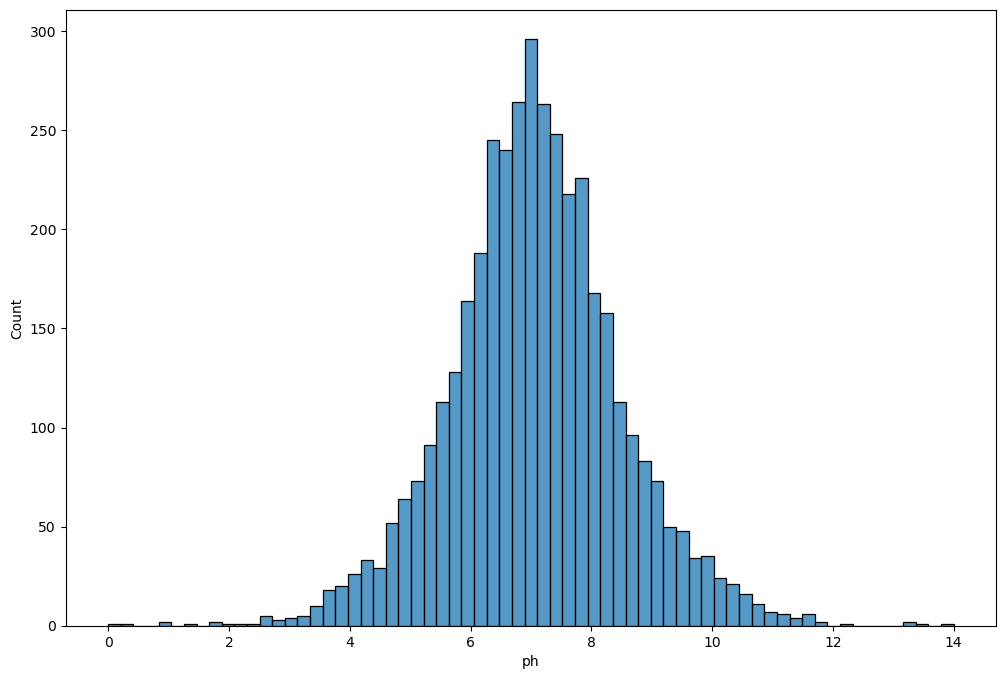

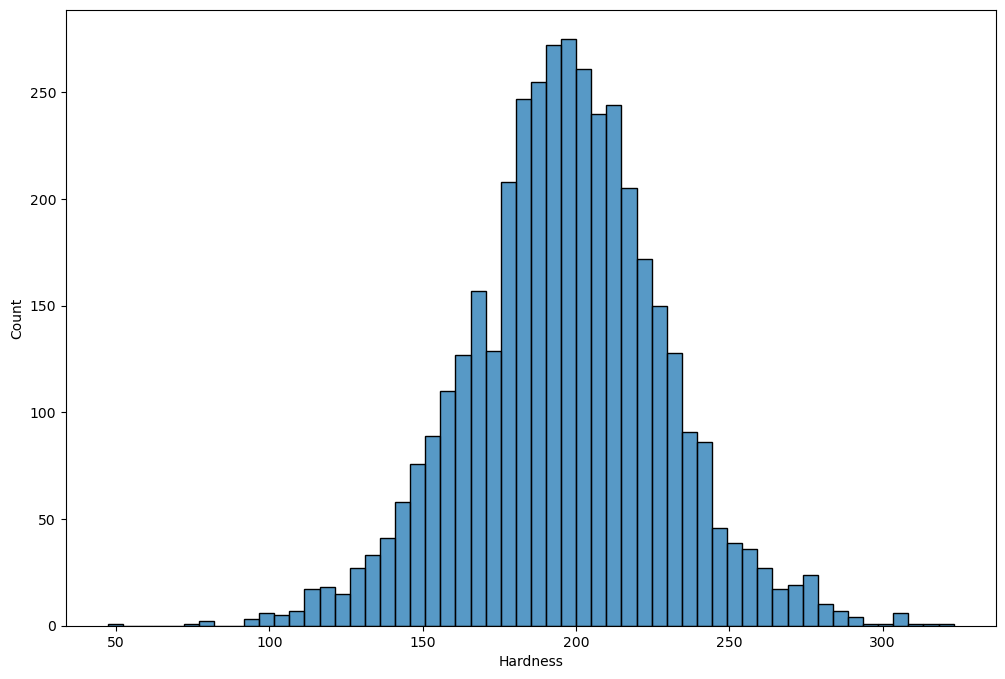

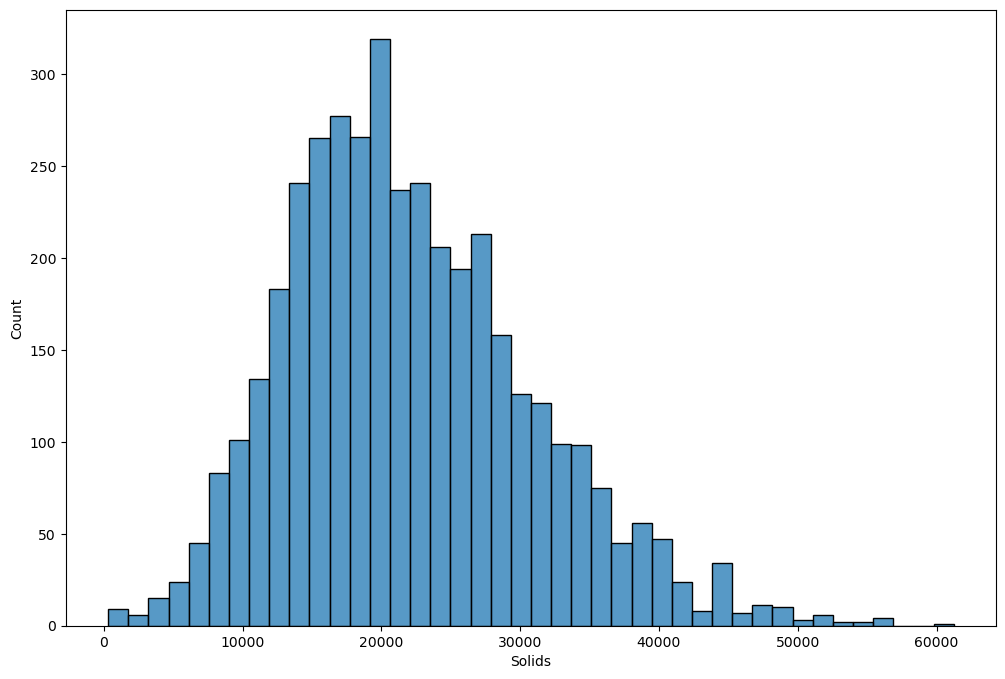

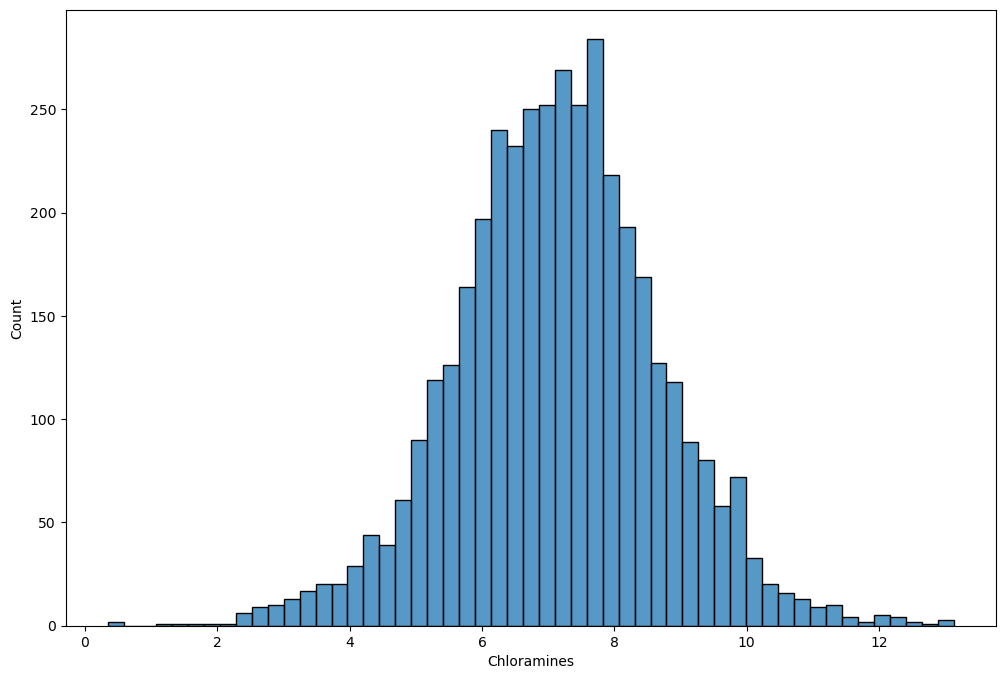

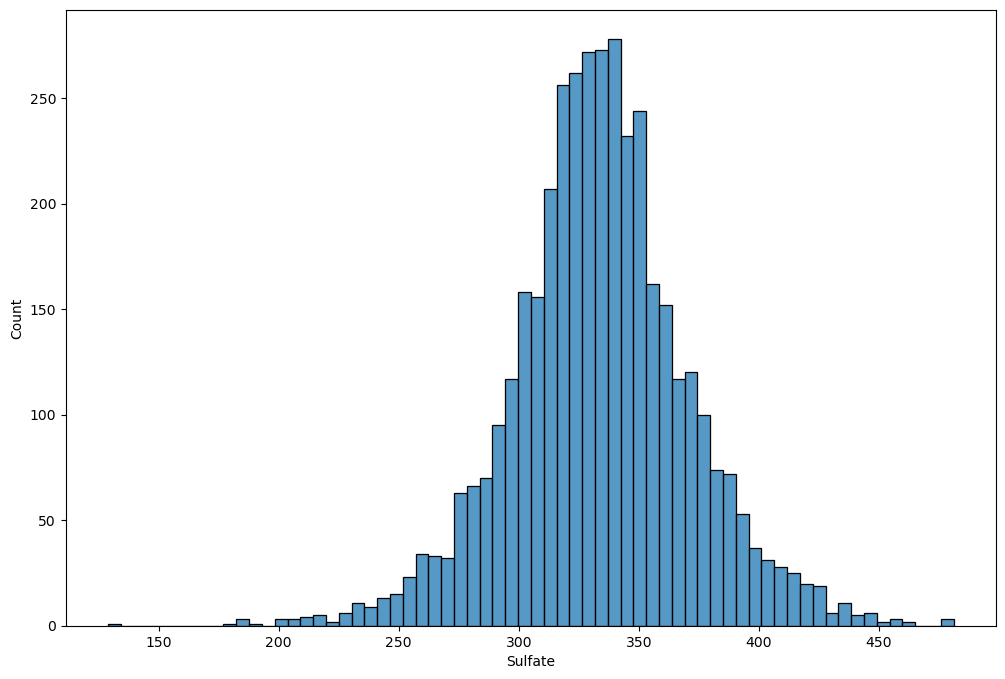

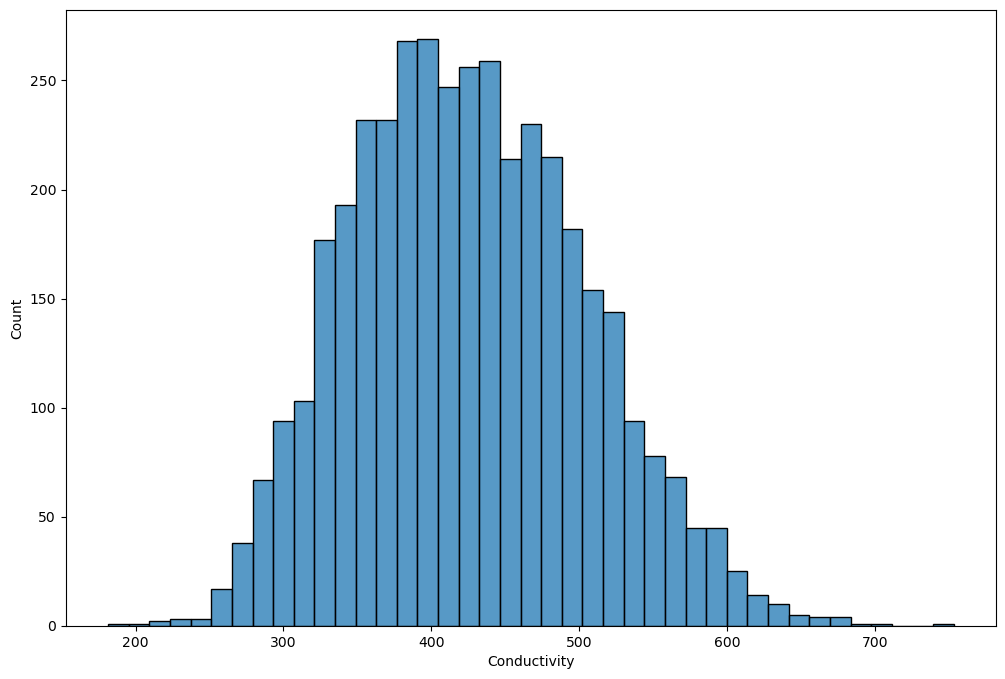

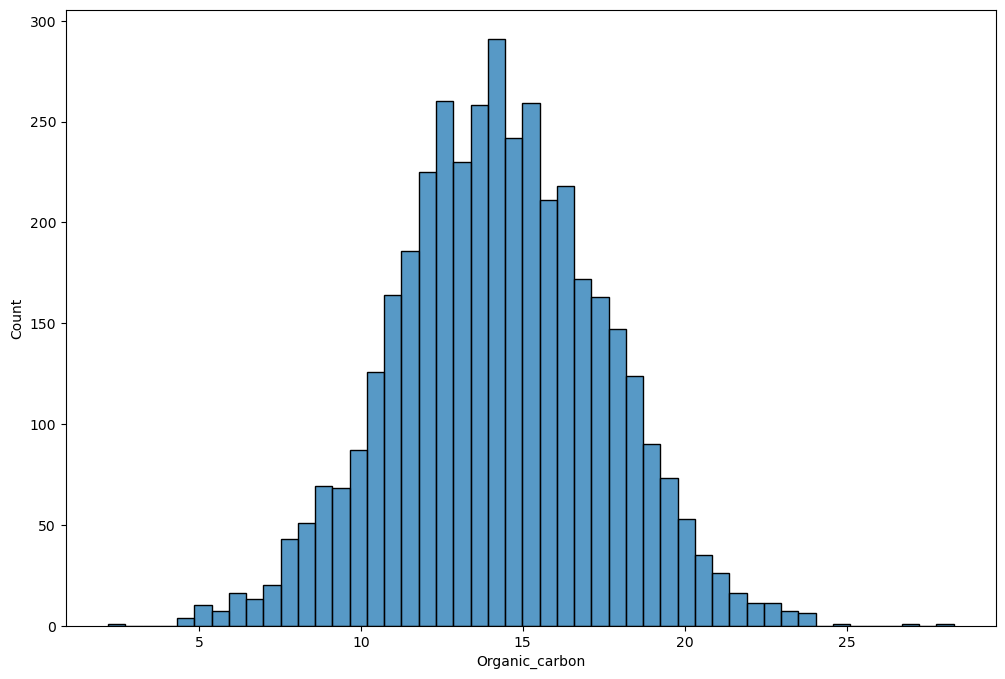

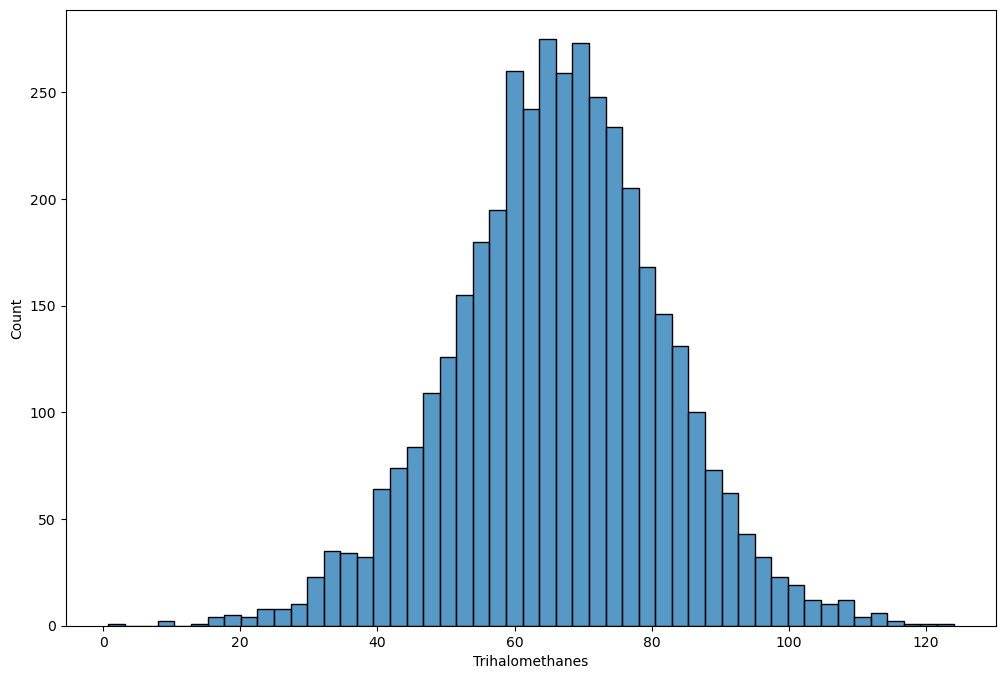

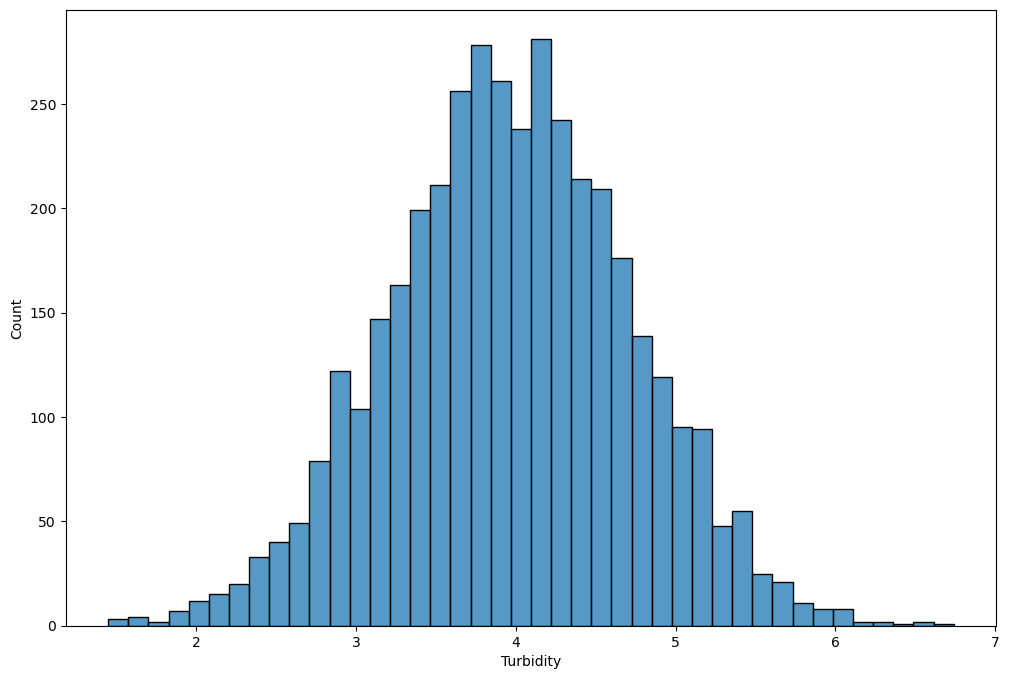

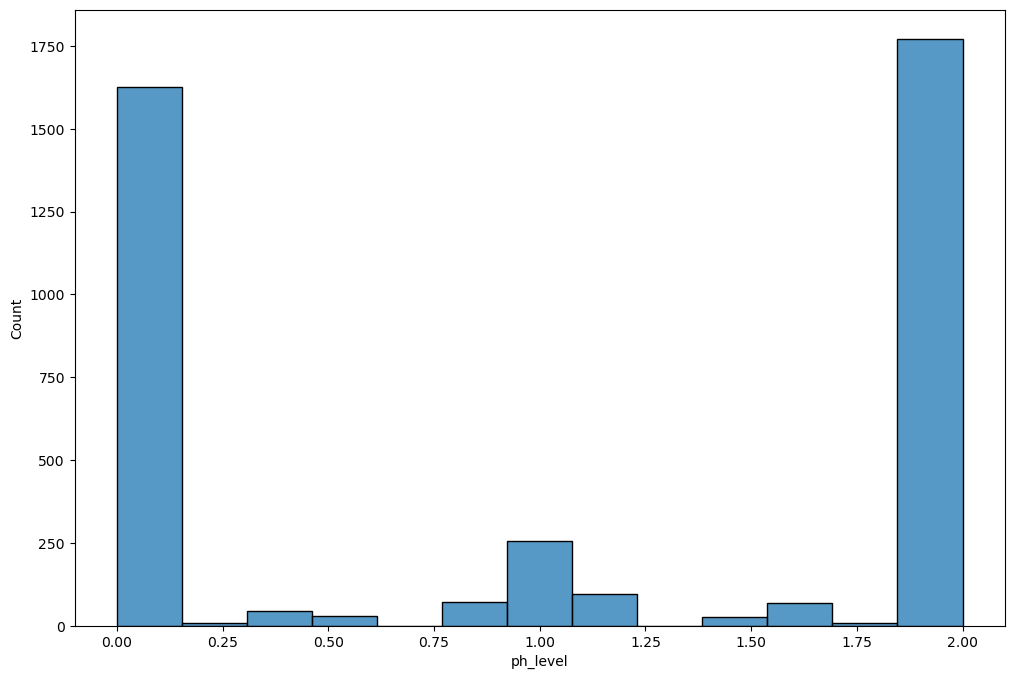

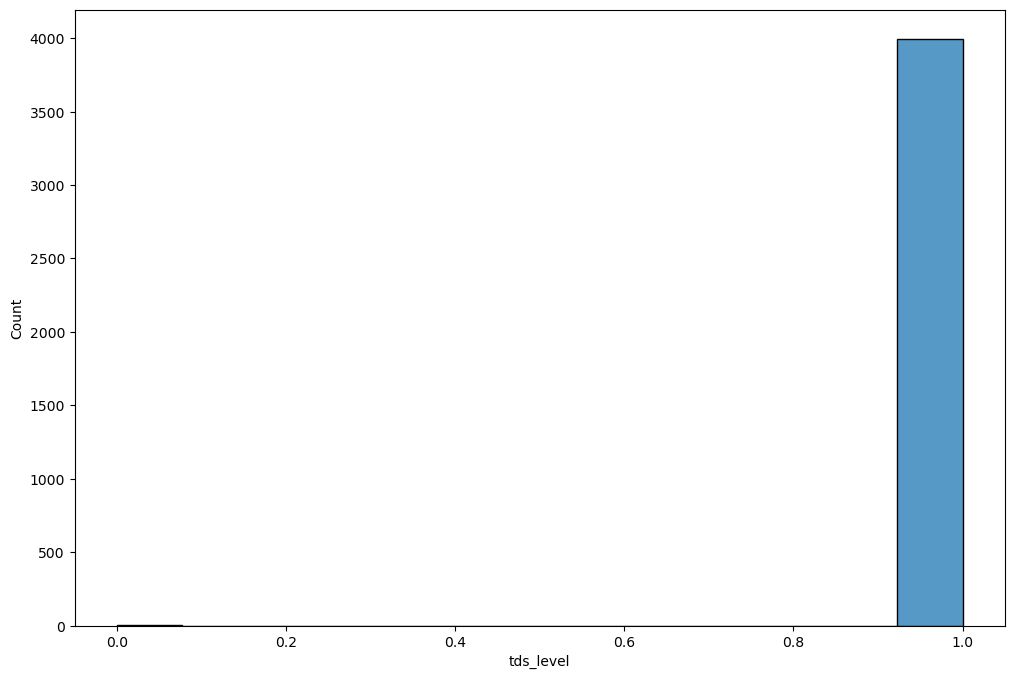

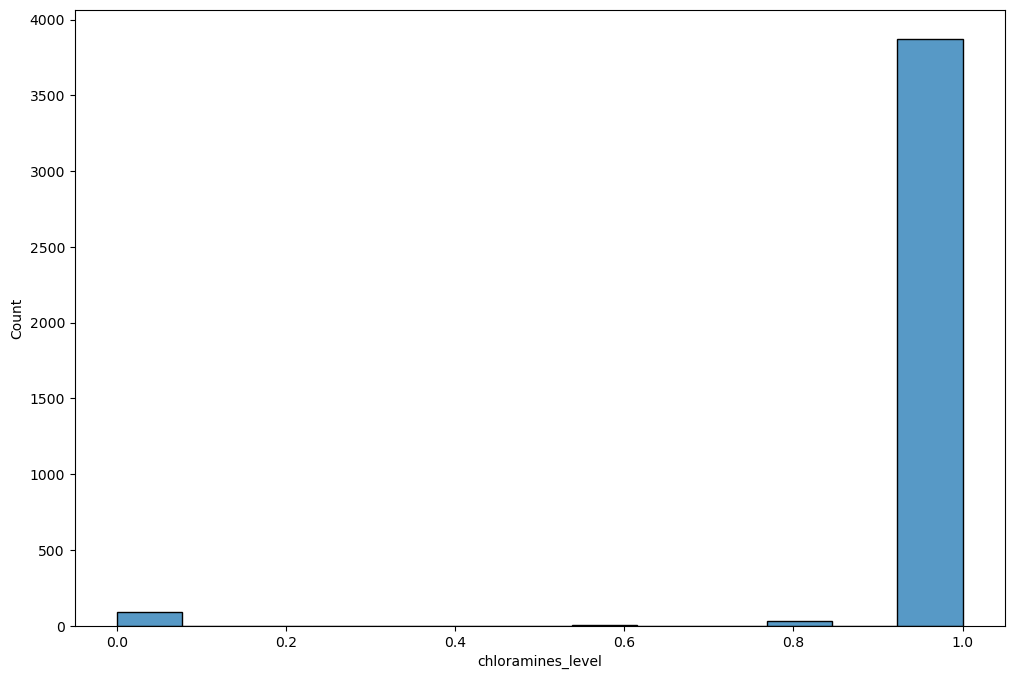

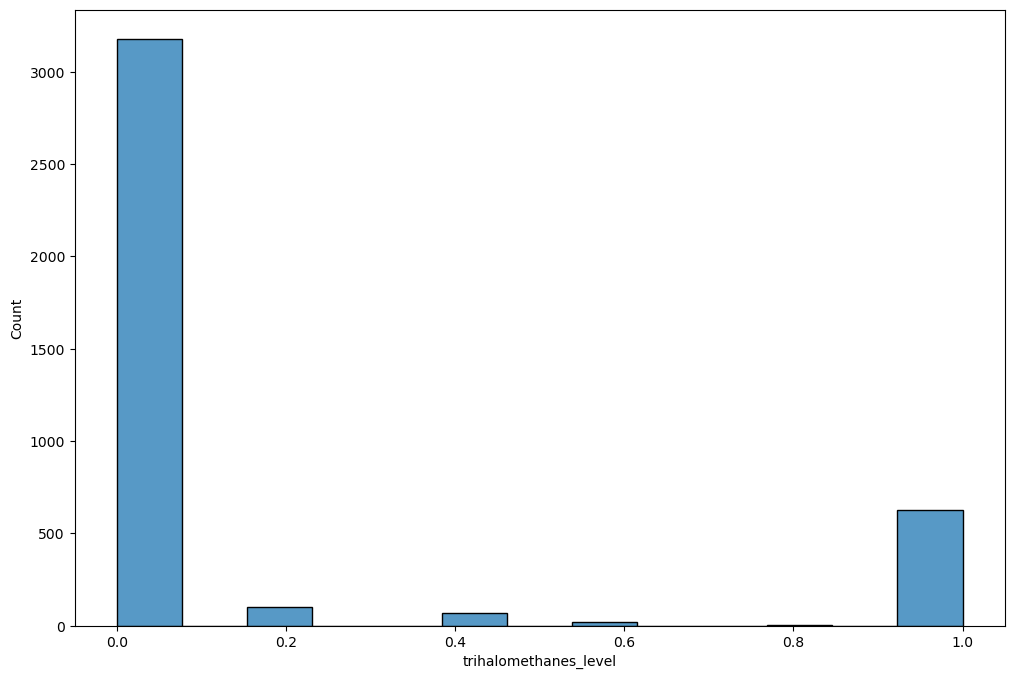

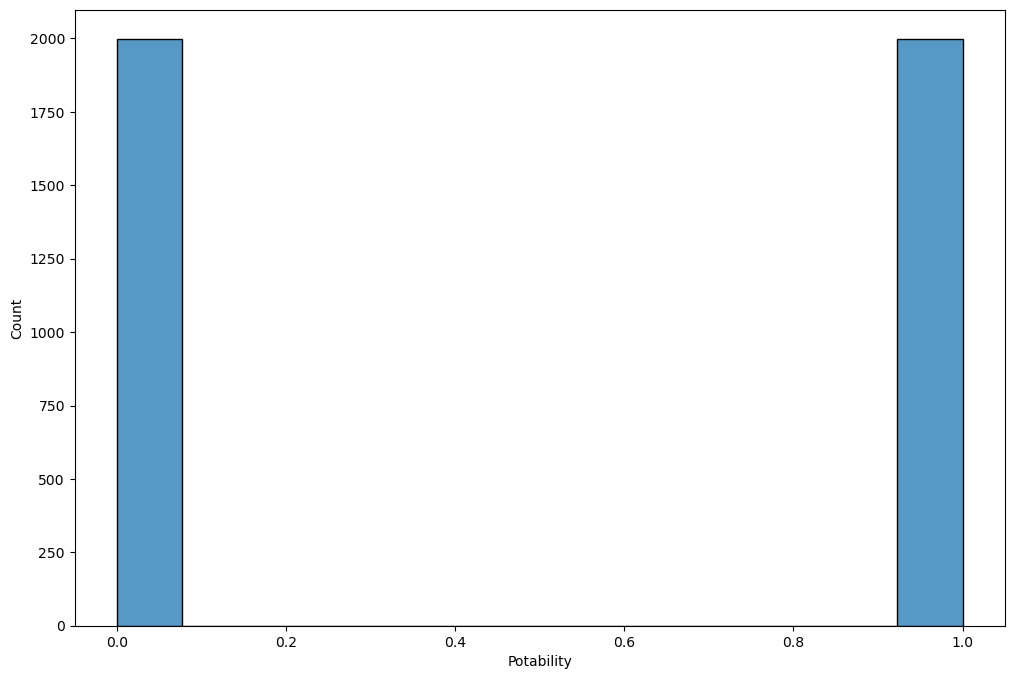

In [58]:
for col in df_remove_balance.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(df_remove_balance[col])

In [60]:
df_remove_balance.tds_level.value_counts()

tds_level
1.0    3995
0.0       1
Name: count, dtype: int64

I found that there is high percentage of imbalance in this feature, so the most optimal method is to remove it

In [62]:
df_remove_balance.drop('tds_level', axis=1, inplace=True)

In [63]:
X, y = df_remove_balance.drop('Potability', axis=1), df_remove_balance['Potability']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test  = scale.transform(X_test)
rfc = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, verbose=2, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)
y_pred = grid_search_rfc.predict(X_test)
accur = accuracy_score(y_test, y_pred)
print('Accuracy score: ', accur)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy score:  0.72125
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       415
           1       0.72      0.68      0.70       385

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



In [84]:
from tensorflow.keras.layers import Dropout
X = df_cleaned.drop('Potability', axis=1)
y = df_cleaned['Potability']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5062 - loss: 0.7854 - val_accuracy: 0.6030 - val_loss: 0.6770
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5597 - loss: 0.7183 - val_accuracy: 0.6030 - val_loss: 0.6709
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5974 - loss: 0.6865 - val_accuracy: 0.6009 - val_loss: 0.6707
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5787 - loss: 0.6804 - val_accuracy: 0.6030 - val_loss: 0.6675
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5838 - loss: 0.6858 - val_accuracy: 0.6030 - val_loss: 0.6673
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6314 - loss: 0.6613 - val_accuracy: 0.6009 - val_loss: 0.6673
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6198 - loss: 0.6665 - val_accuracy: 0.6009 - val_loss: 0.6663
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6111 - loss: 0.6733 - val_accuracy: 0.6009 - val_lo

In [83]:
df_cleaned

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3270    415.886955       12.067620        60.419921   3.669712           1   
3272    392.449580       19.903225        64.327280   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

     ph_level  tds_level chloramines_level trihalomethanes_level  
0           2          1                 1                     1  
1           0          1                 1                     0  
2           2          1                 1                     0  
3           2          1                 1                     1  
4           2          1                 1                     0  
...       ...        ...               ...                   ...  
3270        0          1                 1                     0  
3272        2          1                 1                     0  
3273        2          1                 1                     0  
3274        0          1                 1                     0  
3275        2          1                 1                     0  

[2908 rows x 14 columns]

# Conclusion
After a few tries, I got the highest scores of 72% using Random Forest. However this is the first project that I has incorporated all my knowledge of data analysis, the score is not high enough. In the near future I will try to incorporate other models such as bagging or ensamble method for getting higher score. Also I have noticed that I have repeated redundant procedures which can be easialy solved using reusable functions for more reusability, I will learn from this mistakes and fix it in the near future. 